In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import math

def cmdata_report(cm, classifier, data):# add a df as parameter
    total = cm.sum()
    TP = cm[0,0]
    FN = cm[0,1]
    FP = cm[1,0]
    TN = cm[1,1]
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = FP/(FP+TN)
    FNR = FN/(FN+TP)
    ratio = (cm[0,0]+cm[1,1])/total
    PPV = TP/(TP+FP)
    AUC = (1 + TPR - FPR)/2
    GMEAN = math.sqrt(TNR*TPR)
    F1 = 2*TP/(2*TP+FP+FN)
    GMEASURE = math.sqrt(PPV*TPR)
    
    s = pd.Series([TPR,TNR,FPR,FNR,AUC,GMEAN,F1,GMEASURE], name=classifier, index=report.columns)
    df = data.append(s)
    return df

def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

In [3]:
column_names = ['TPR','TNR','FPR','FNR','AUC','G-Mean','F1', 'G-Measure']
report = pd.DataFrame(columns = column_names)
columns_train = ['id',
 'Nombre',
 'Año',
 'Kilometros',
 #'Combustible',
 'Mano',
 'Consumo',
 'Motor_CC',
 'Potencia',
 'Tipo_marchas',
 #'Asientos',
 'Descuento',
 'Precio_cat']
columns_test = ['id',
 'Nombre',
 'Año',
 'Kilometros',
 #'Combustible',
 'Mano',
 'Consumo',
 'Motor_CC',
 'Potencia',
 #'Asientos',
 'Tipo_marchas',
 'Descuento']
 #'Asientos']
seed = 2232527064

In [4]:
train = pd.read_csv("../csv/train.csv")
test = pd.read_csv("../csv/test.csv")

In [5]:
train.columns

Index(['id', 'Nombre', 'Ciudad', 'Año', 'Kilometros', 'Combustible',
       'Tipo_marchas', 'Mano', 'Consumo', 'Motor_CC', 'Potencia', 'Asientos',
       'Descuento', 'Precio_cat'],
      dtype='object')

In [6]:
train.shape

(4819, 14)

In [7]:
test_id = test.id

In [8]:
cols = train.columns.tolist()
for i in cols:
    print(i)
    print(train[i].unique())

id
[1.000e+00 2.000e+00 3.000e+00 ... 4.817e+03 4.818e+03 4.819e+03]
Nombre
['Maruti Swift Dzire ZDI' 'Maruti Wagon R LXI Optional'
 'Mahindra KUV 100 mFALCON D75 K8' ...
 'Mercedes-Benz E-Class 280 Elegance' 'Honda City Corporate Edition'
 'Porsche Panamera Diesel 250hp']
Ciudad
['G' 'I' 'F' 'E' 'H' 'C' 'J' 'L' 'B' 'K' 'D' nan]
Año
[2012. 2016. 2013. 2017. 2009. 2014. 2011. 2015. 2008. 2010. 2018. 2006.
   nan 2019. 2005. 2007. 2003. 2004. 2001. 1998. 2002. 2000. 1999.]
Kilometros
[83000.  4800. 26000. ... 60033. 40158. 65743.]
Combustible
['Diesel' 'Petrol' nan 'CNG' 'LPG' 'Electric']
Tipo_marchas
['Manual' 'Automatic' nan]
Mano
['First' 'Second' 'Third' nan 'Fourth & Above']
Consumo
['23.4 kmpl' '20.51 kmpl' '25.32 kmpl' '18.5 kmpl' '18.7 kmpl' '17.8 kmpl'
 '16.8 kmpl' '18.6 kmpl' '25.2 kmpl' '10.91 kmpl' '12.99 kmpl' '17.5 kmpl'
 '25.8 kmpl' '18.25 kmpl' '10.0 kmpl' '11.5 kmpl' '19.1 kmpl' '14.21 kmpl'
 '14.16 kmpl' '17.43 kmpl' '18.0 kmpl' '15.7 kmpl' '16.0 kmpl'
 '21.43 kmpl' '21

In [9]:
train['Descuento'] = train['Descuento'].fillna(0)
train['Mano'].fillna('mv', inplace = True)
train['Tipo_marchas'].fillna('mv', inplace = True)
train['Nombre'].fillna('mv', inplace = True)
test['Descuento'] = test['Descuento'].fillna(0)


In [10]:
train.isnull().sum()

id               72
Nombre            0
Ciudad           72
Año              72
Kilometros       72
Combustible      72
Tipo_marchas      0
Mano              0
Consumo          73
Motor_CC        101
Potencia        175
Asientos        106
Descuento         0
Precio_cat        0
dtype: int64

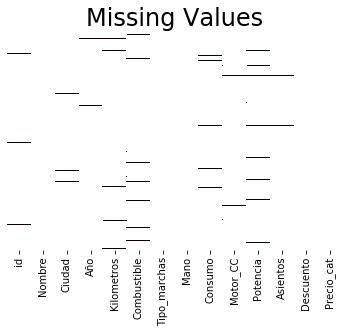

In [11]:
fig = sns.heatmap(train.isnull(), cbar=False, cmap='hot_r', yticklabels=[]).set_title('Missing Values', fontsize=24);

In [12]:
rows = train.Nombre.tolist()
marcas = []
r = 0
for i in rows:
    if i != 'mv':
        train.at[r,'Nombre'] = i.split(' ', 1)[0].upper()
    r += 1
train.head()

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,1.0,MARUTI,G,2012.0,83000.0,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,0.0,3
1,2.0,MARUTI,I,2016.0,4800.0,Petrol,Manual,First,20.51 kmpl,998 CC,67.04 bhp,5.0,0.0,3
2,3.0,MAHINDRA,F,2016.0,26000.0,Diesel,Manual,First,25.32 kmpl,1198 CC,77 bhp,6.0,0.0,3
3,4.0,HYUNDAI,E,2013.0,56127.0,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,0.0,3
4,5.0,HONDA,H,2017.0,41981.0,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,0.0,3


In [13]:
rows = test.Nombre.tolist()
marcas = []
r = 0
for i in rows:
    test.at[r,'Nombre'] = i.split(' ', 1)[0].upper()
    r += 1
test.head()

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento
0,4820,MERCEDES-BENZ,H,2015,77771,Diesel,Automatic,First,19.27 kmpl,2143 CC,170 bhp,5.0,0.0
1,4821,HYUNDAI,J,2011,62000,Petrol,Manual,First,19.81 kmpl,1086 CC,68.05 bhp,5.0,0.0
2,4822,FORD,C,2010,129986,Diesel,Manual,Second,20.0 kmpl,1399 CC,68 bhp,5.0,0.0
3,4823,MARUTI,D,2015,49900,Petrol,Manual,First,20.85 kmpl,1197 CC,83.14 bhp,5.0,0.0
4,4824,MARUTI,J,2010,75319,Petrol,Manual,Second,21.1 kmpl,1197 CC,85.80 bhp,5.0,0.0


In [14]:
train.columns

Index(['id', 'Nombre', 'Ciudad', 'Año', 'Kilometros', 'Combustible',
       'Tipo_marchas', 'Mano', 'Consumo', 'Motor_CC', 'Potencia', 'Asientos',
       'Descuento', 'Precio_cat'],
      dtype='object')

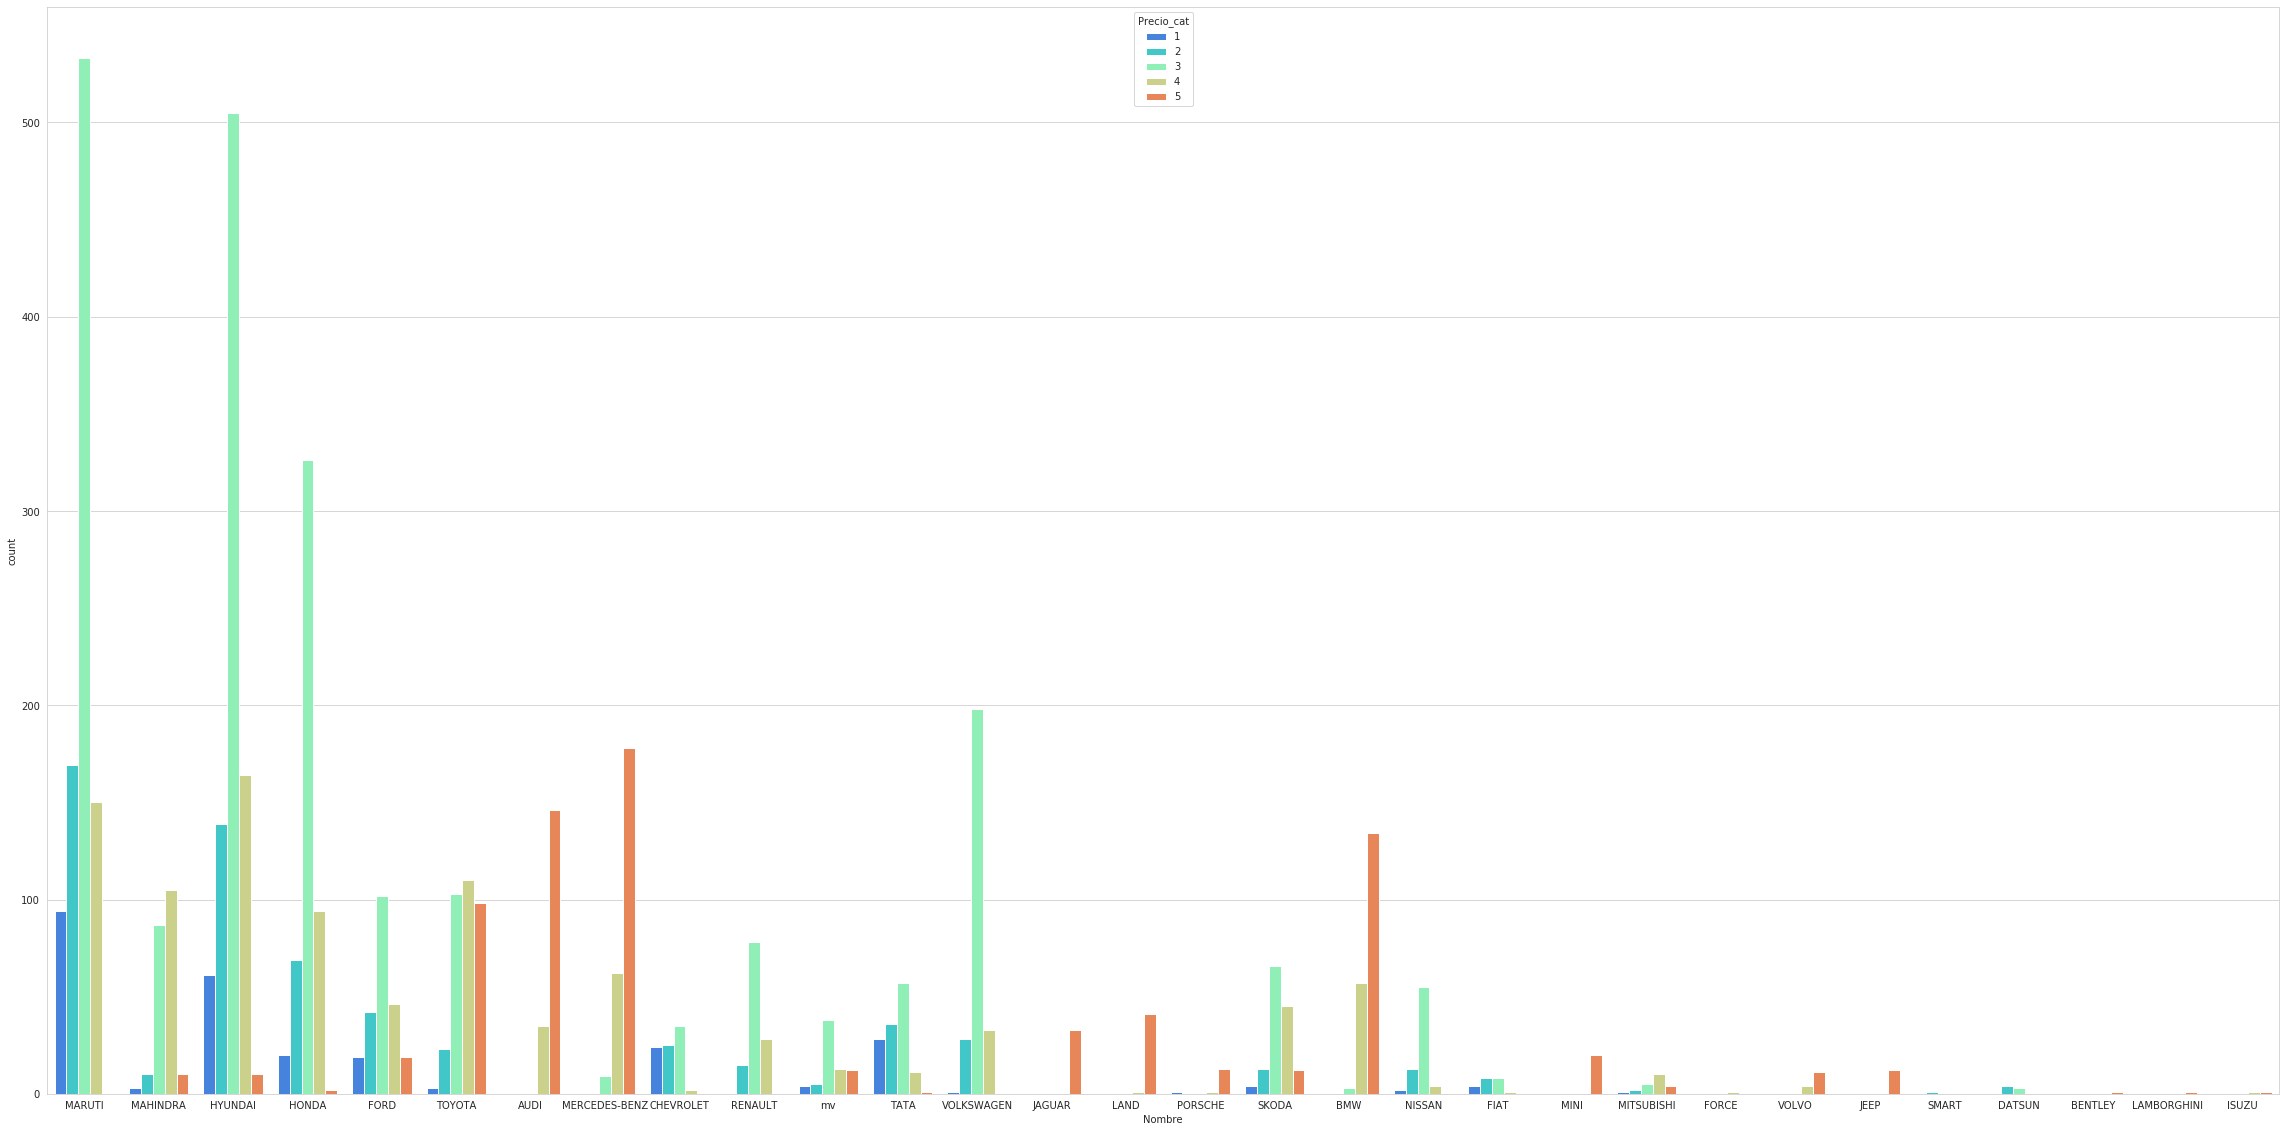

In [15]:
plt.figure(figsize=(40, 20))
sns.set_style('whitegrid')
sns.countplot(x = 'Nombre',hue='Precio_cat',data=train,palette='rainbow')

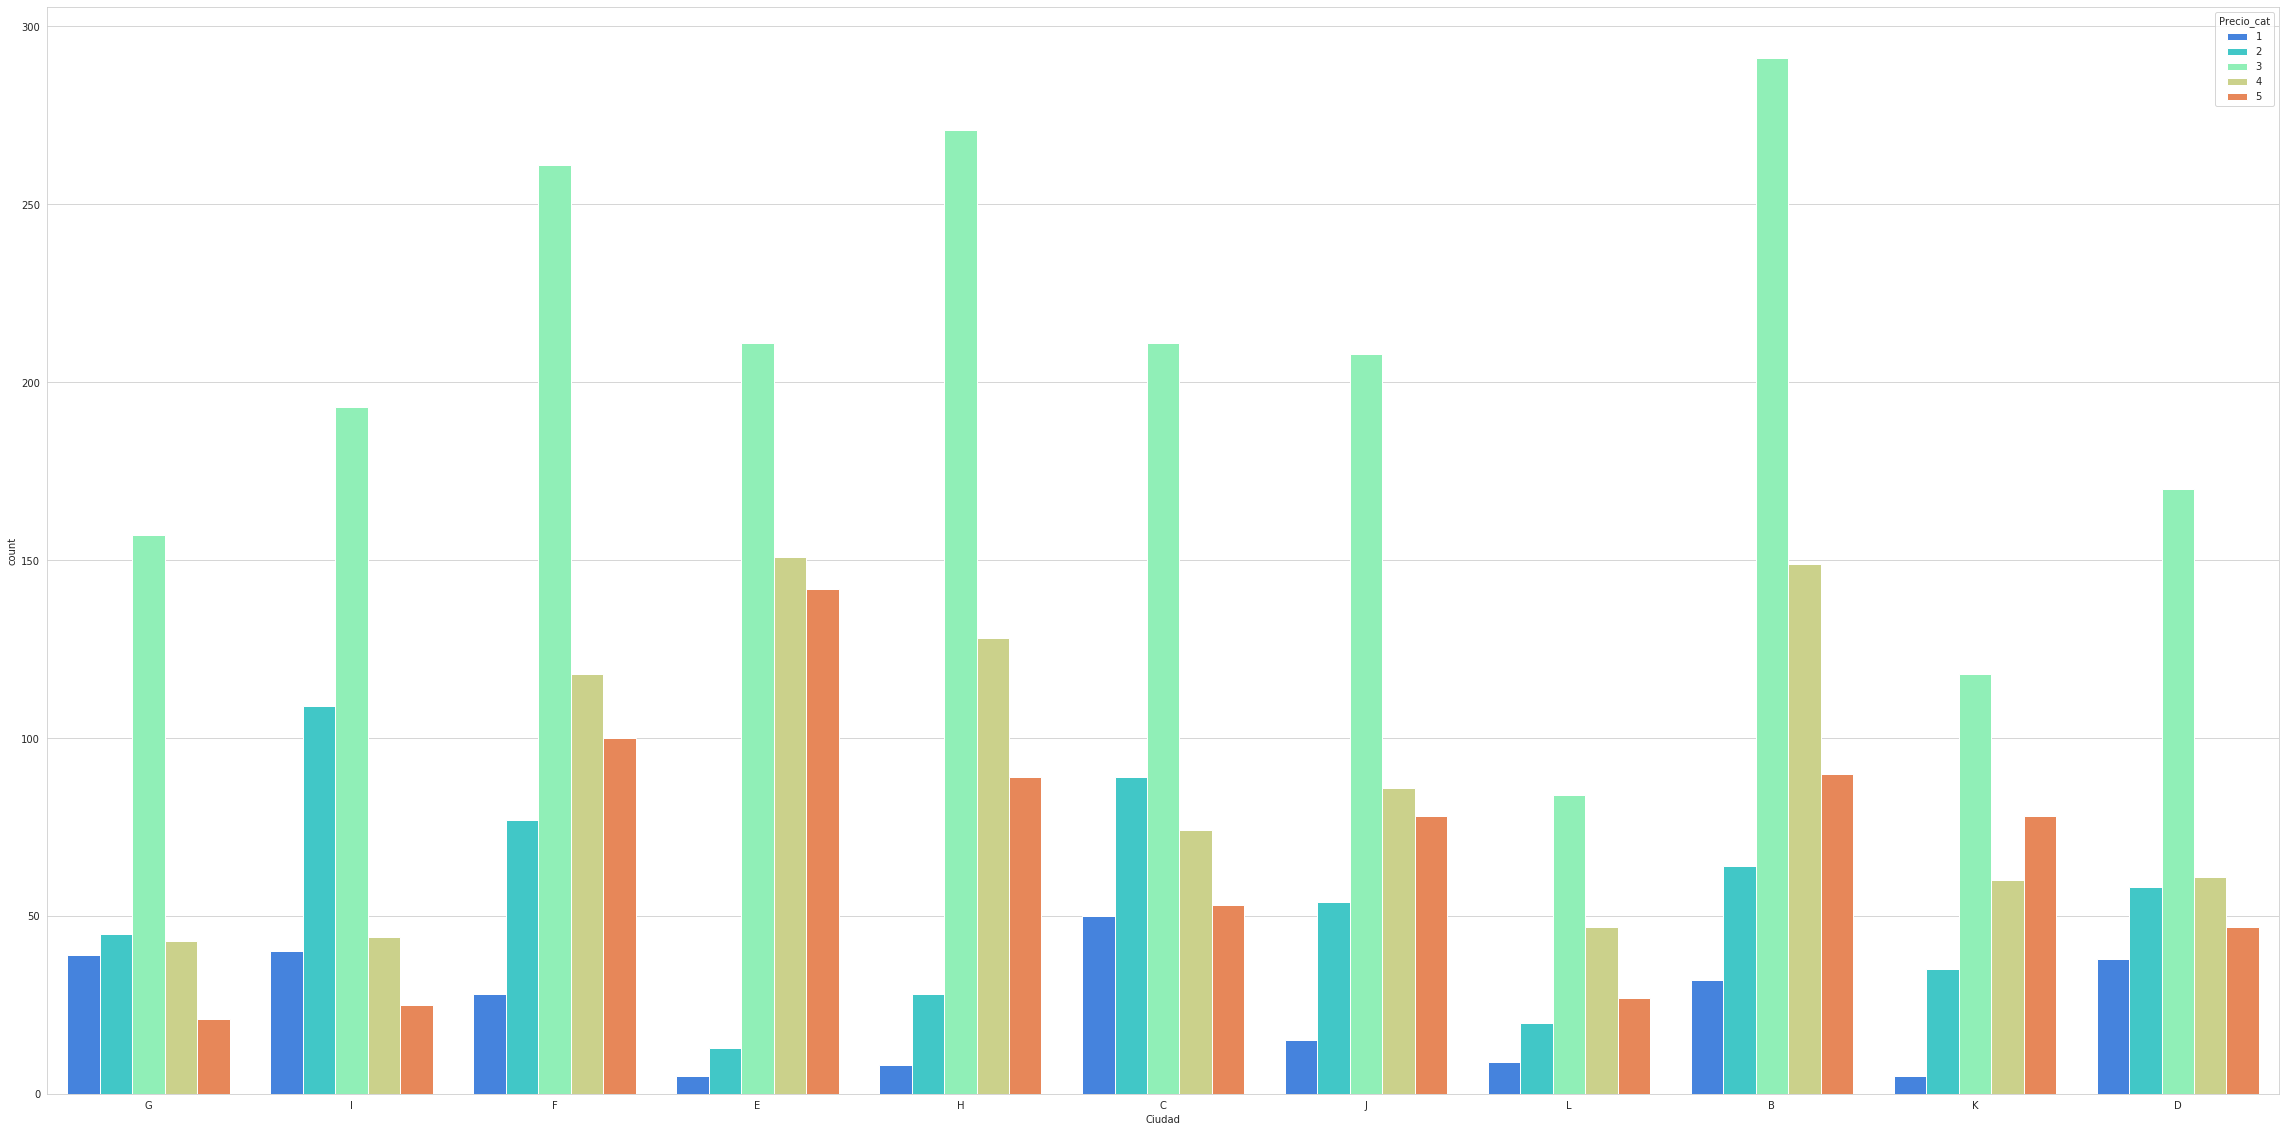

In [16]:
plt.figure(figsize=(40, 20))
sns.set_style('whitegrid')
sns.countplot(x = 'Ciudad',hue='Precio_cat',data=train,palette='rainbow')

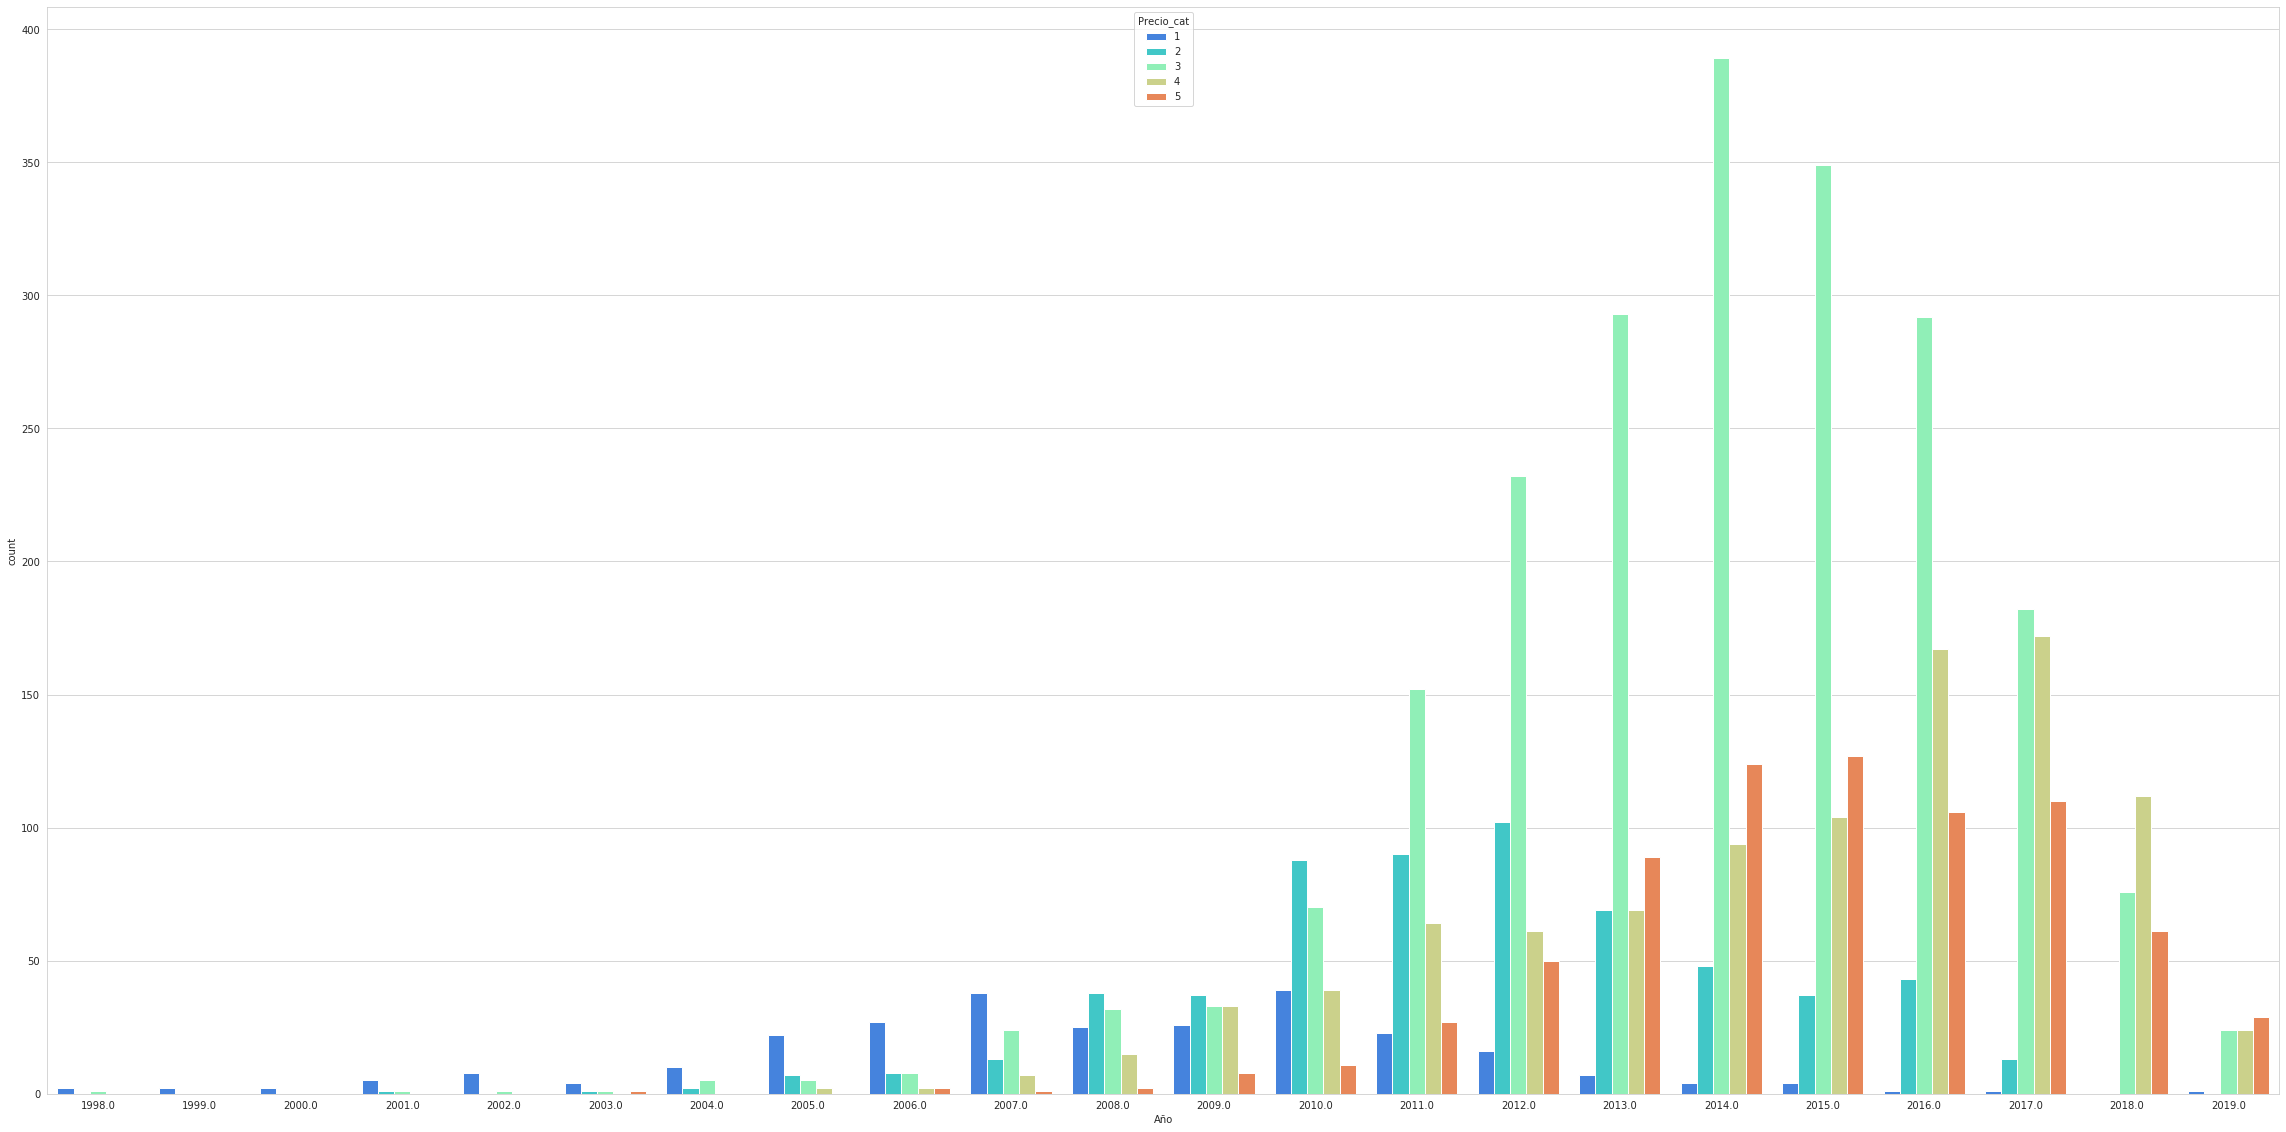

In [17]:
plt.figure(figsize=(40, 20))
sns.set_style('whitegrid')
sns.countplot(x = 'Año',hue='Precio_cat',data=train,palette='rainbow')

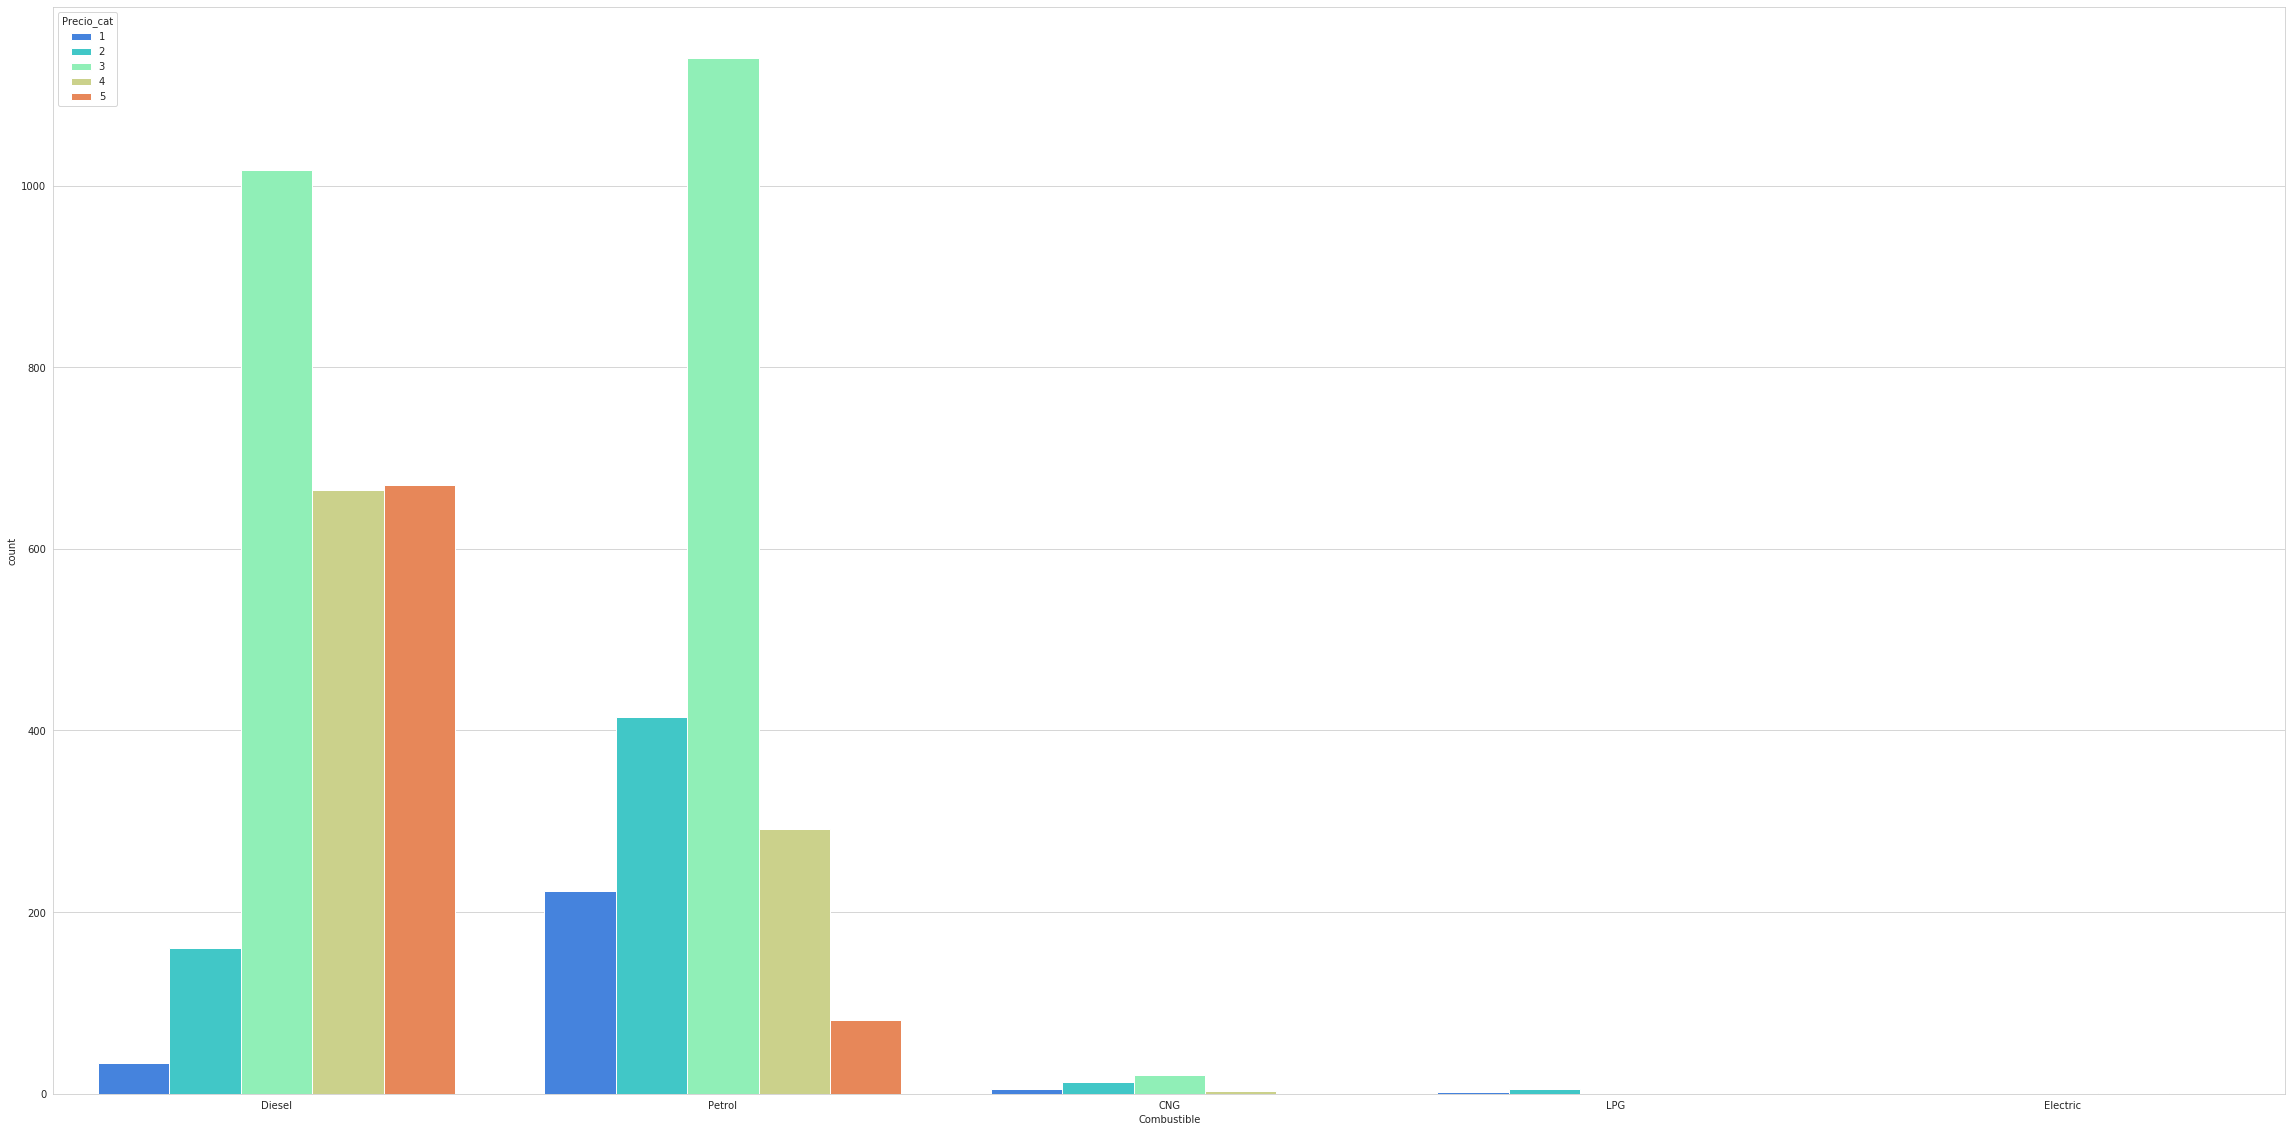

In [18]:
plt.figure(figsize=(40, 20))
sns.set_style('whitegrid')
sns.countplot(x = 'Combustible',hue='Precio_cat',data=train,palette='rainbow')

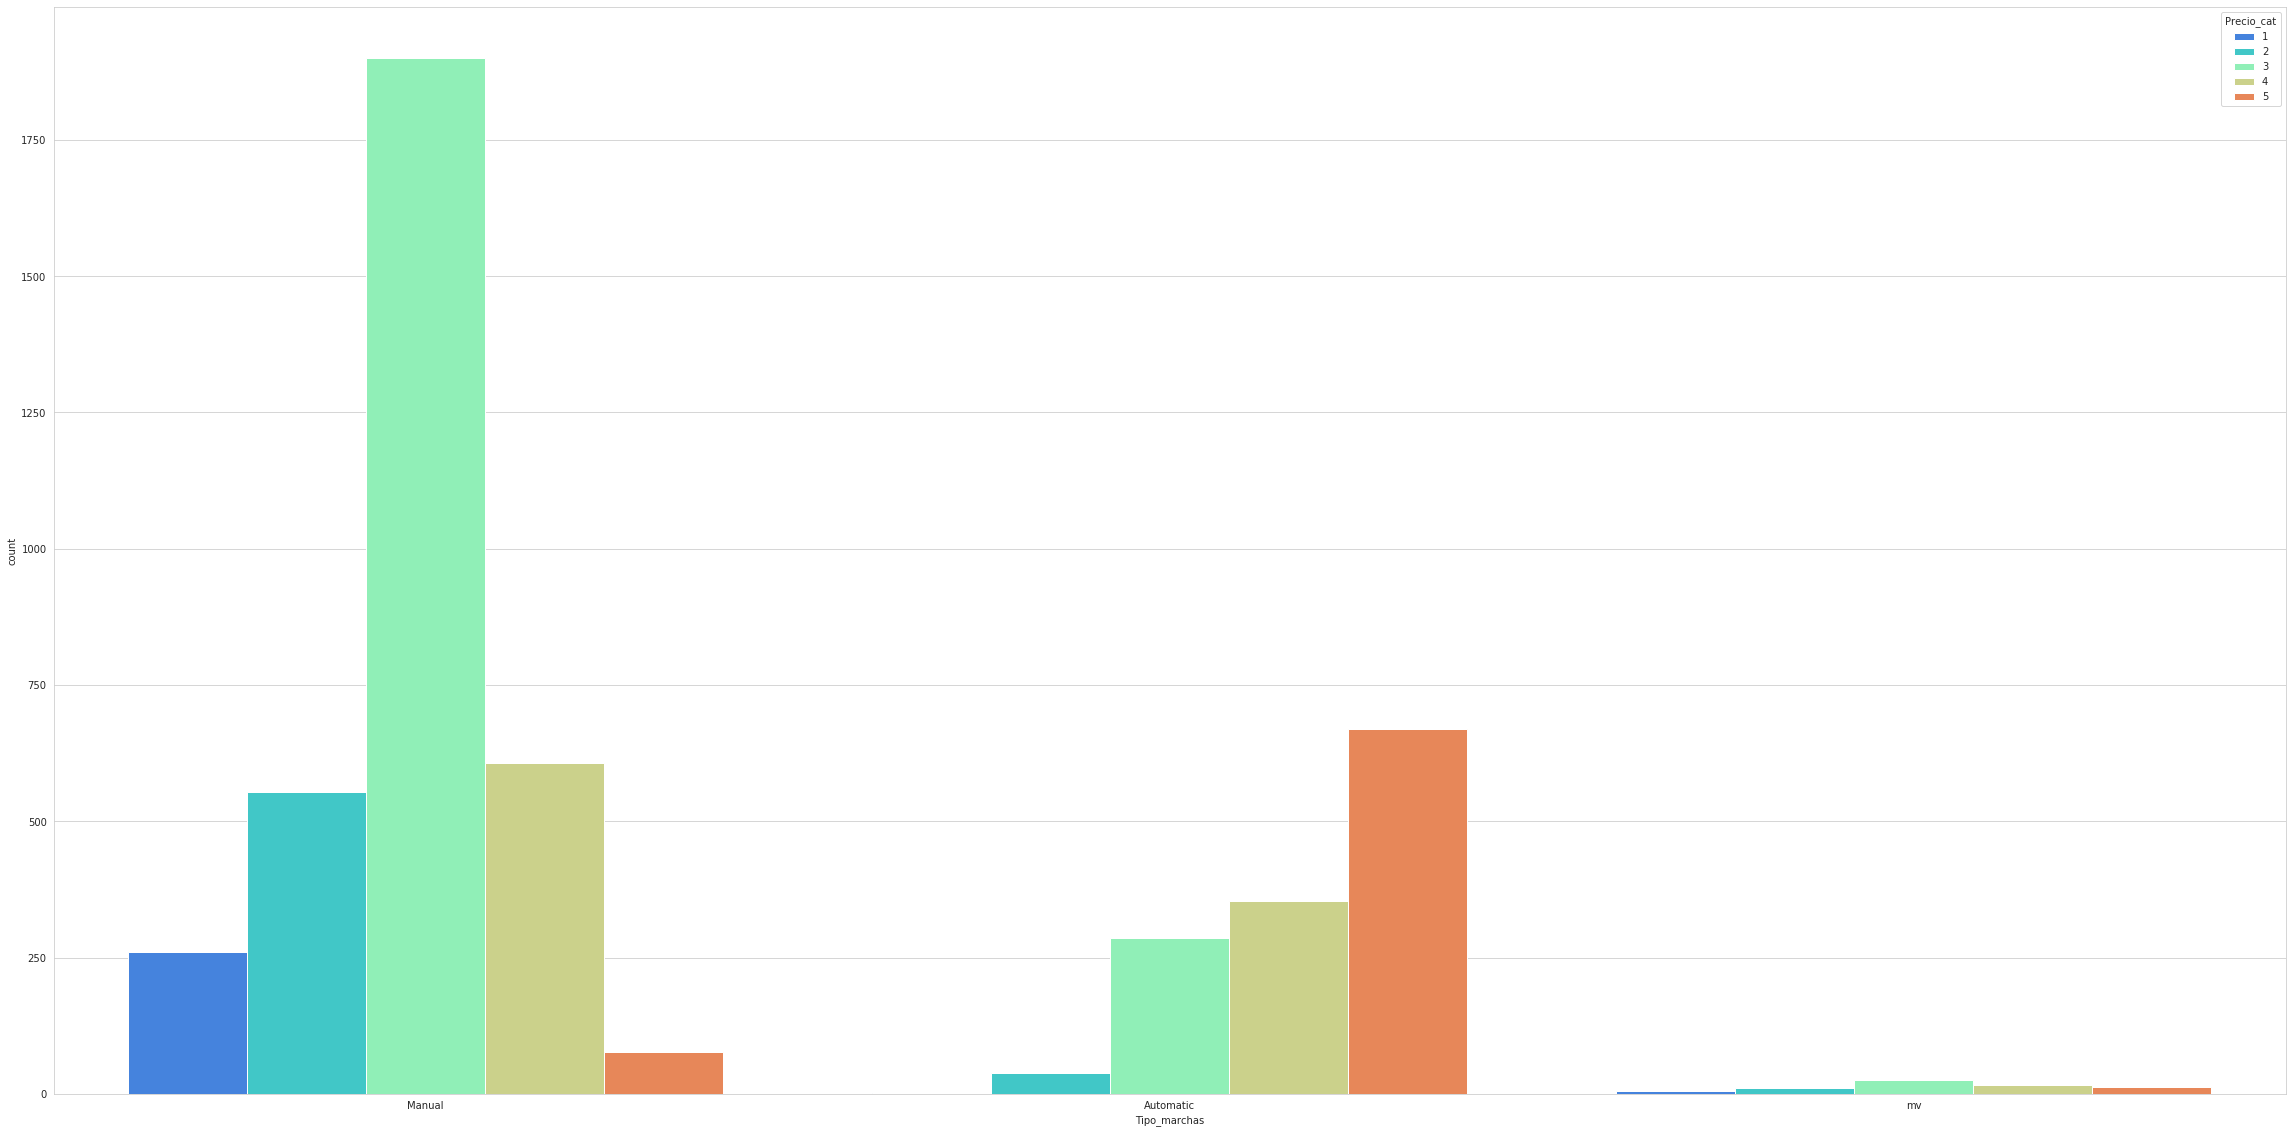

In [19]:
plt.figure(figsize=(40, 20))
sns.set_style('whitegrid')
sns.countplot(x = 'Tipo_marchas',hue='Precio_cat',data=train,palette='rainbow')

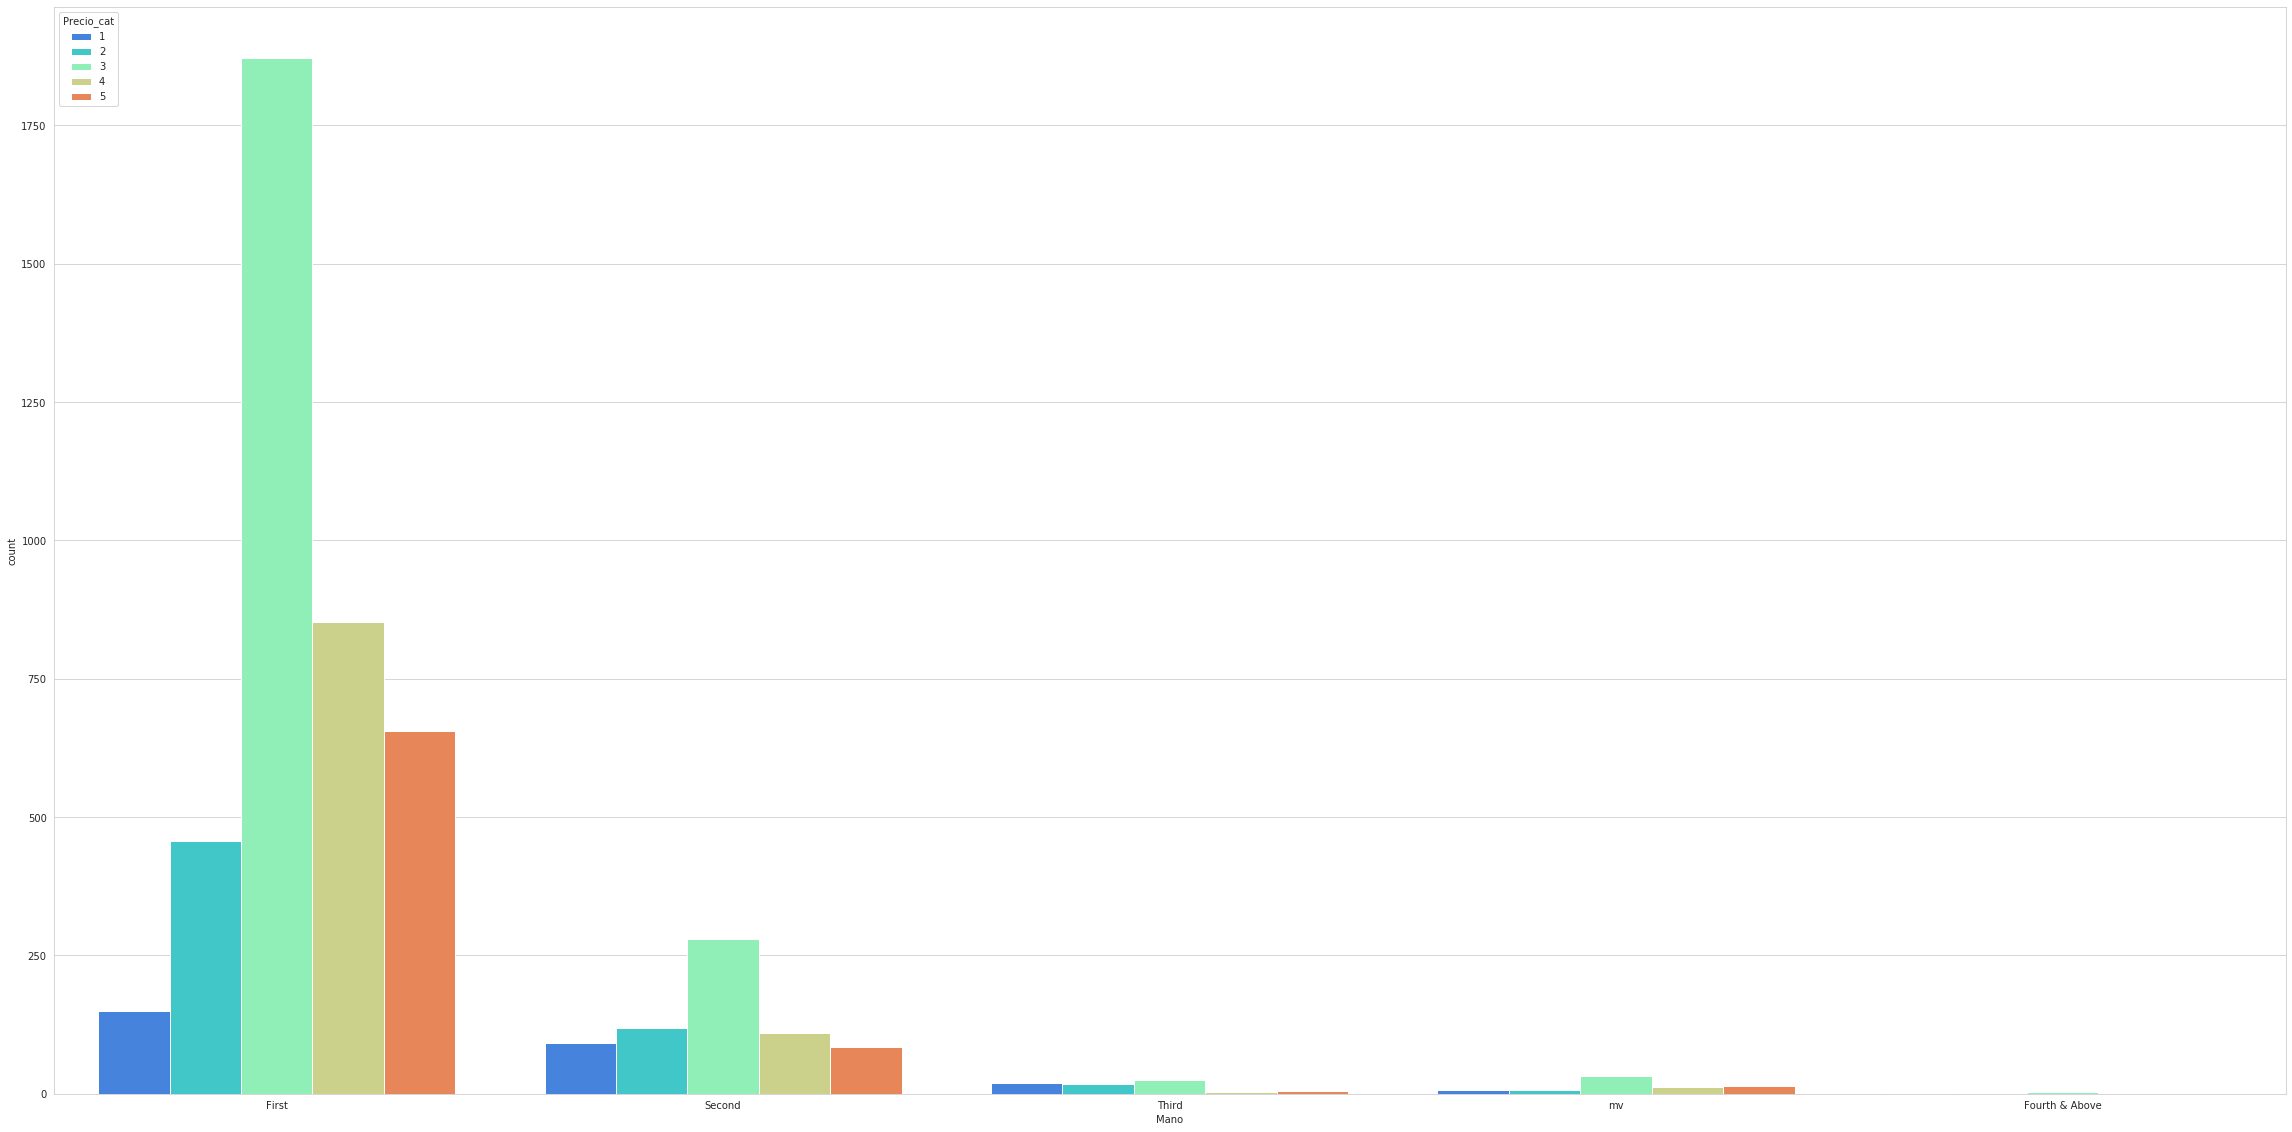

In [20]:
plt.figure(figsize=(40, 20))
sns.set_style('whitegrid')
sns.countplot(x = 'Mano',hue='Precio_cat',data=train,palette='rainbow')

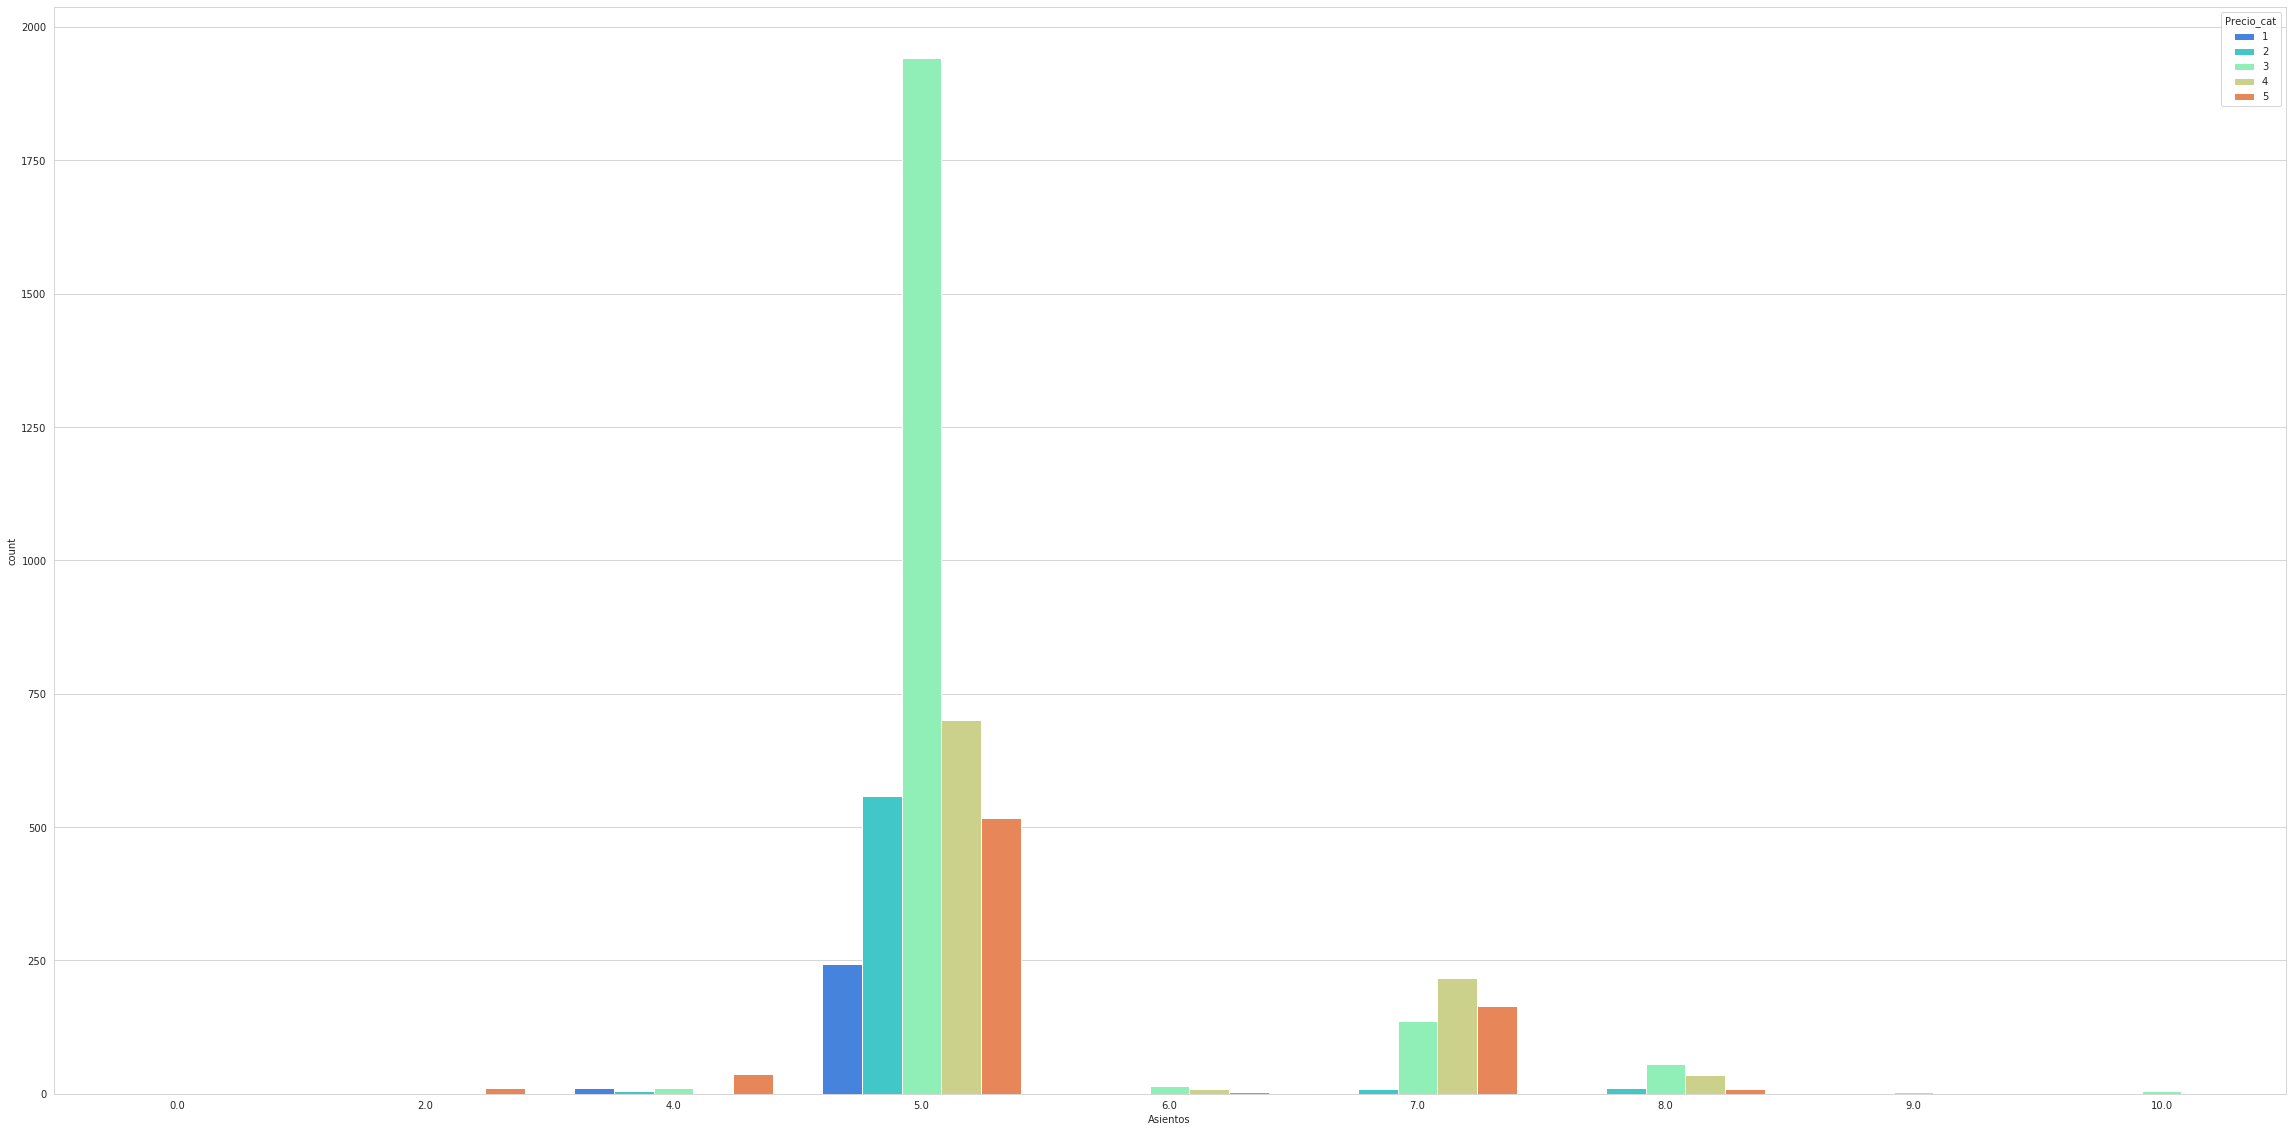

In [21]:
plt.figure(figsize=(40, 20))
sns.set_style('whitegrid')
sns.countplot(x = 'Asientos',hue='Precio_cat',data=train,palette='rainbow')

In [22]:
# para descuento, potencia, etc. mirar como hacer plot de rango de valores

In [23]:
train = train[columns_train].copy()
test = test[columns_test].copy()
print(test.shape)

(1159, 10)


# Preprocessing data

Get the cols float values using regular expressions

In [24]:
import re
import math

for index, row in train.iterrows():
    #print(row.Consumo)
    consumo = row.Consumo
    motor = row.Motor_CC
    potencia = row.Potencia
    
    if type(consumo) == str:
        train.loc[index,'Consumo'] = float(re.findall(r"^\d+\.\d+", consumo)[0])
    if type(motor) == str:
        train.loc[index,'Motor_CC'] = float(re.findall(r"^\d+", motor)[0])
    if type(potencia) == str:
        train.loc[index,'Potencia'] = float(re.findall(r"^\d+", potencia)[0])
        
for index, row in test.iterrows():
    #print(row.Consumo)
    consumo = row.Consumo
    motor = row.Motor_CC
    potencia = row.Potencia
    
    if type(consumo) == str:
        test.loc[index,'Consumo'] = float(re.findall(r"^\d+\.\d+", consumo)[0])
    if type(motor) == str:
        test.loc[index,'Motor_CC'] = float(re.findall(r"^\d+", motor)[0])
    if type(potencia) == str:
        test.loc[index,'Potencia'] = float(re.findall(r"^\d+", potencia)[0])
        
train['Consumo'] = train['Consumo'].astype(float)
train['Motor_CC'] = train['Motor_CC'].astype(float)
train['Potencia'] = train['Potencia'].astype(float)

test['Consumo'] = test['Consumo'].astype(float)
test['Motor_CC'] = test['Motor_CC'].astype(float)
test['Potencia'] = test['Potencia'].astype(float)

train.head()

,id,Nombre,Año,Kilometros,Mano,Consumo,Motor_CC,Potencia,Tipo_marchas,Descuento,Precio_cat
0,1.0,MARUTI,2012.0,83000.0,First,23.40,1248.0,74.0,Manual,0.0,3
1,2.0,MARUTI,2016.0,4800.0,First,20.51,998.0,67.0,Manual,0.0,3
2,3.0,MAHINDRA,2016.0,26000.0,First,25.32,1198.0,77.0,Manual,0.0,3
3,4.0,HYUNDAI,2013.0,56127.0,First,18.50,1197.0,80.0,Manual,0.0,3
4,5.0,HONDA,2017.0,41981.0,First,18.70,1199.0,88.0,Manual,0.0,3


encode the values

In [25]:
from sklearn import preprocessing
le_nombre = preprocessing.LabelEncoder()
le_marcha = preprocessing.LabelEncoder()
le_mano = preprocessing.LabelEncoder()

data_train = train.copy()
data_train = data_train.drop('id', axis=1)
nombres =  list(set(train['Nombre'].tolist()) | set(test['Nombre'].tolist())) 
le_nombre.fit(nombres)
train_labels = le_nombre.classes_.tolist()
data_train['Nombre'] = le_nombre.transform(data_train['Nombre'])
data_train['Tipo_marchas'] = le_marcha.fit_transform(data_train['Tipo_marchas'])
data_train['Mano'] = le_mano.fit_transform(data_train['Mano'])

data_test = test.copy()
data_test = data_test.drop('id', axis=1)
data_test['Nombre'] = le_nombre.transform(data_test['Nombre'])
data_test['Tipo_marchas'] = le_marcha.transform(data_test['Tipo_marchas'])
data_test['Mano'] = le_mano.transform(data_test['Mano'])
test_labels = le_nombre.classes_.tolist()

In [26]:
train_names = train.Nombre.unique().tolist()
print(train_names)
print(train_labels)
print(test_labels)

['MARUTI', 'MAHINDRA', 'HYUNDAI', 'HONDA', 'FORD', 'TOYOTA', 'AUDI', 'MERCEDES-BENZ', 'CHEVROLET', 'RENAULT', 'mv', 'TATA', 'VOLKSWAGEN', 'JAGUAR', 'LAND', 'PORSCHE', 'SKODA', 'BMW', 'NISSAN', 'FIAT', 'MINI', 'MITSUBISHI', 'FORCE', 'VOLVO', 'JEEP', 'SMART', 'DATSUN', 'BENTLEY', 'LAMBORGHINI', 'ISUZU']
['AMBASSADOR', 'AUDI', 'BENTLEY', 'BMW', 'CHEVROLET', 'DATSUN', 'FIAT', 'FORCE', 'FORD', 'HONDA', 'HYUNDAI', 'ISUZU', 'JAGUAR', 'JEEP', 'LAMBORGHINI', 'LAND', 'MAHINDRA', 'MARUTI', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN', 'PORSCHE', 'RENAULT', 'SKODA', 'SMART', 'TATA', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'mv']
['AMBASSADOR', 'AUDI', 'BENTLEY', 'BMW', 'CHEVROLET', 'DATSUN', 'FIAT', 'FORCE', 'FORD', 'HONDA', 'HYUNDAI', 'ISUZU', 'JAGUAR', 'JEEP', 'LAMBORGHINI', 'LAND', 'MAHINDRA', 'MARUTI', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN', 'PORSCHE', 'RENAULT', 'SKODA', 'SMART', 'TATA', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'mv']


In [27]:
print('Nombres: '+str(list(le_nombre.inverse_transform(range(len(list(le_nombre.classes_)))))))
print('\nMarchas: '+str(list(le_marcha.inverse_transform(range(len(list(le_marcha.classes_)))))))
print('\nMano: '+str(list(le_mano.inverse_transform(range(len(list(le_mano.classes_)))))))

Nombres: ['AMBASSADOR', 'AUDI', 'BENTLEY', 'BMW', 'CHEVROLET', 'DATSUN', 'FIAT', 'FORCE', 'FORD', 'HONDA', 'HYUNDAI', 'ISUZU', 'JAGUAR', 'JEEP', 'LAMBORGHINI', 'LAND', 'MAHINDRA', 'MARUTI', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN', 'PORSCHE', 'RENAULT', 'SKODA', 'SMART', 'TATA', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'mv']

Marchas: ['Automatic', 'Manual', 'mv']

Mano: ['First', 'Fourth & Above', 'Second', 'Third', 'mv']


In [28]:
mv_key = [len(list(le_nombre.classes_))-1, len(list(le_marcha.classes_))-1, len(list(le_mano.classes_))-1]

In [29]:
# swap the missing values as 'mv' for numpy.nan
def swap_mv(df):
    rows = [df.Nombre.tolist(), df.Tipo_marchas.tolist(), df.Mano.tolist()]
    feature = ['Nombre', 'Tipo_marchas', 'Mano']
    
    for i in range(0,3):
        r = 0
        for k in rows[i]:
            if k == mv_key[i]:
                df.loc[r, feature[i]] = np.nan
            r += 1
    
    return df

Missing values imputation

1. delete mv

In [30]:
#data_without_nan = train.copy().dropna()

2. use most freq value

In [31]:
#data_most_freq = data_train.copy()
#data_most_freq['Combustible'].fillna(value=data_most_freq['Combustible'].value_counts().index[0],inplace =True)
#data_most_freq['Mano'].fillna(value=data_most_freq['Mano'].value_counts().index[0],inplace =True)
#data_most_freq['Nombre'].fillna(value=data_most_freq['Nombre'].value_counts().index[0],inplace =True)
#data_most_freq['Tipo_marcha'].fillna(value=data_most_freq['Tipo_marcha'].value_counts().index[0],inplace =True)

3. treat mv as a separate category.

In [32]:
# let 'mv' values get their own label
# data_mv_as_separate_category = data_train.copy()

In [33]:
mv_key = [len(list(le_nombre.classes_))-1, len(list(le_marcha.classes_))-1, len(list(le_mano.classes_))-1]

4. clf algorithms like rf, knn, etc. in order to impute mv(prediction models)

5. impute mv based in other row(s) (K-nn?)

In [34]:
from sklearn.impute import KNNImputer
data_swapping = swap_mv(data_train)

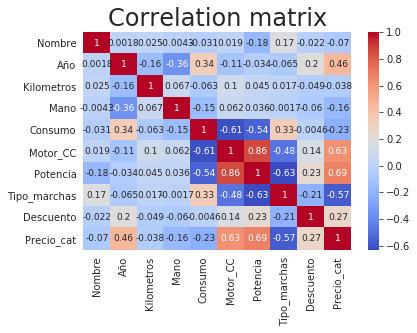

In [35]:
sns.heatmap(data_swapping.corr(), annot=True, cmap='coolwarm',
            annot_kws={"fontsize":9}).set_title('Correlation matrix', fontsize=24);
plt.yticks(rotation=0);

In [36]:
data_swapping.isnull().sum()

Nombre           72
Año              72
Kilometros       72
Mano             72
Consumo          73
Motor_CC        101
Potencia        175
Tipo_marchas     72
Descuento         0
Precio_cat        0
dtype: int64

In [37]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
#imputer = KNNImputer()

imputer.fit(data_swapping)
data_knn = imputer.transform(data_swapping)

In [38]:
print(data_knn.shape)
print(data_test.shape)

(4819, 10)
(1159, 9)


In [39]:
data_knn = pd.DataFrame(data=data_knn, columns=data_train.columns)

In [40]:
data_knn.head()

,Nombre,Año,Kilometros,Mano,Consumo,Motor_CC,Potencia,Tipo_marchas,Descuento,Precio_cat
0,17.0,2012.0,83000.0,0.0,23.40,1248.0,74.0,1.0,0.0,3.0
1,17.0,2016.0,4800.0,0.0,20.51,998.0,67.0,1.0,0.0,3.0
2,16.0,2016.0,26000.0,0.0,25.32,1198.0,77.0,1.0,0.0,3.0
3,10.0,2013.0,56127.0,0.0,18.50,1197.0,80.0,1.0,0.0,3.0
4,9.0,2017.0,41981.0,0.0,18.70,1199.0,88.0,1.0,0.0,3.0


In [41]:
data_test.head()

,Nombre,Año,Kilometros,Mano,Consumo,Motor_CC,Potencia,Tipo_marchas,Descuento
0,18,2015,77771,0,19.27,2143.0,170.0,0,0.0
1,10,2011,62000,0,19.81,1086.0,68.0,1,0.0
2,8,2010,129986,2,20.00,1399.0,68.0,1,0.0
3,17,2015,49900,0,20.85,1197.0,83.0,1,0.0
4,17,2010,75319,2,21.10,1197.0,85.0,1,0.0


In [42]:
data_knn.isnull().sum()

Nombre          0
Año             0
Kilometros      0
Mano            0
Consumo         0
Motor_CC        0
Potencia        0
Tipo_marchas    0
Descuento       0
Precio_cat      0
dtype: int64

In [43]:
cols = data_knn.columns.tolist()
for i in cols:
    print(i)
    print(data_knn[i].unique())

Nombre
[17.  16.  10.   9.   8.  27.   1.  18.   4.  23.  13.6 26.  28.  12.
 15.  22.  24.   3.  21.   6.  20.  19.  10.6 15.6 14.6  7.  12.2 19.4
 29.  13.  12.4  2.8  9.4 25.   3.8 13.4  5.   9.2 15.8  4.6 14.2 14.
  2.   8.8 17.8 14.8 12.8 13.2 21.4 11.4 11.8 11.  16.2 13.8 16.8 11.6]
Año
[2012.  2016.  2013.  2017.  2009.  2014.  2011.  2015.  2008.  2010.
 2018.  2006.  2019.  2005.  2007.  2003.  2012.2 2004.  2016.6 2001.
 1998.  2014.4 2010.6 2015.4 2012.8 2013.2 2013.6 2012.6 2014.8 2002.
 2013.4 2010.8 2015.6 2000.  2010.4 2011.6 2015.8 2017.6 2014.2 1999.
 2015.2 2010.2 2011.8 2012.4 2013.8 2011.4 2009.8]
Kilometros
[83000.  4800. 26000. ... 60033. 40158. 65743.]
Mano
[0.  2.  3.  0.4 1.  0.8 0.6]
Consumo
[23.4   20.51  25.32  18.5   18.7   17.8   16.8   18.6   25.2   10.91
 12.99  17.5   25.8   18.25  10.    11.5   19.1   14.21  14.16  17.43
 18.    15.7   16.    21.43  21.64  20.73  14.    17.9   28.4   15.96
 10.548 23.65  20.36  21.9   14.46  22.95  23.59  17.57  21.27 

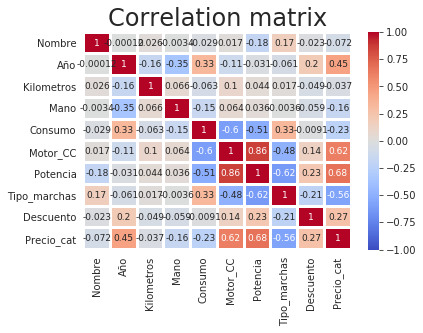

In [44]:
sns.heatmap(data_knn.corr(), annot=True, cmap='coolwarm',
            center=0, vmin=-1, vmax=1, linewidth=2, annot_kws={"fontsize":9},
            square=False, cbar=True).set_title('Correlation matrix', fontsize=24);
plt.yticks(rotation=0);

In [45]:
X = data_knn.drop('Precio_cat', axis=1)
y = data_knn['Precio_cat']

target = y

In [46]:
import random
seed = 2232527064
from sklearn.model_selection import StratifiedKFold
cv_ = StratifiedKFold(n_splits=5, shuffle=True)
print("Actual seed: "+str(seed))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
test = sc.transform(data_test)

Actual seed: 2232527064


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
        X, y, random_state=seed, test_size=0.1
    )

import lightgbm as lgb
#{'colsample_bytree': 0.5, 'num_leaves': 10, 'subsample': 0.5}
clf = lgb.LGBMClassifier(random_state=seed, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

from sklearn.metrics import classification_report, confusion_matrix
rf_cmatrix = confusion_matrix(y_val, y_pred)
rf_report = get_classification_report(y_val, y_pred)
report = cmdata_report(rf_cmatrix, 'split', report)

In [48]:
from sklearn.model_selection import cross_val_predict
clf = lgb.LGBMClassifier(random_state=seed, n_jobs=-1)
clf.fit(X, y)
y_pred = cross_val_predict(clf, X, y, cv=cv_, n_jobs=-1)

rf_cmatrix = confusion_matrix(y, y_pred)
rf_report = get_classification_report(y, y_pred)
report = cmdata_report(rf_cmatrix, 'all dataset -cv-', report)

In [49]:
report

,TPR,TNR,FPR,FNR,AUC,G-Mean,F1,G-Measure
split,0.722222,0.813953,0.186047,0.277778,0.768088,0.766717,0.666667,0.668648
all dataset -cv-,0.705882,0.895141,0.104859,0.294118,0.800512,0.794899,0.756303,0.758239


In [50]:
rf_report

,precision,recall,f1-score,support
5.0,0.901170,0.913043,0.907068,759.000000
3.0,0.827308,0.879692,0.852696,2211.000000
accuracy,0.808466,0.808466,0.808466,0.808466
weighted avg,0.805689,0.808466,0.806133,4819.000000
macro avg,0.788615,0.757531,0.771550,4819.000000
4.0,0.795628,0.744376,0.769149,978.000000
1.0,0.789474,0.669145,0.724346,269.000000
2.0,0.629496,0.581395,0.604491,602.000000


In [51]:
prediction = clf.predict(test)

In [52]:
prediction

array([5., 2., 2., ..., 4., 5., 5.])

In [53]:
submit = pd.DataFrame(columns = ['id', 'Precio_cat'])
submit['Precio_cat'] = prediction.tolist()
submit['id'] = test_id.tolist()

In [60]:
submit['Precio_cat'] = submit['Precio_cat'].astype('int')

In [61]:
submit

,id,Precio_cat
0,4820,5
1,4821,2
2,4822,2
3,4823,3
4,4824,2
...,...,...
1154,5974,1
1155,5975,3
1156,5976,4
1157,5977,5


In [62]:
submit.to_csv('submission.csv', index=False)